In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
df = pd.read_csv('../data/data.csv', encoding='ISO-8859-1')
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [3]:
# Snapshot date (latest invoice date + 1)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [4]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


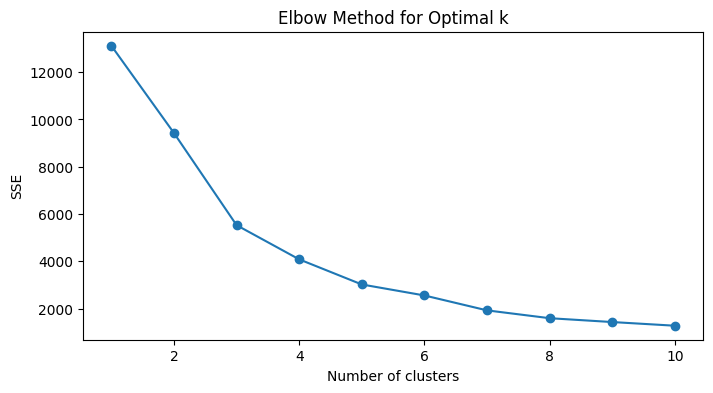

In [5]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,2,0.00,1
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


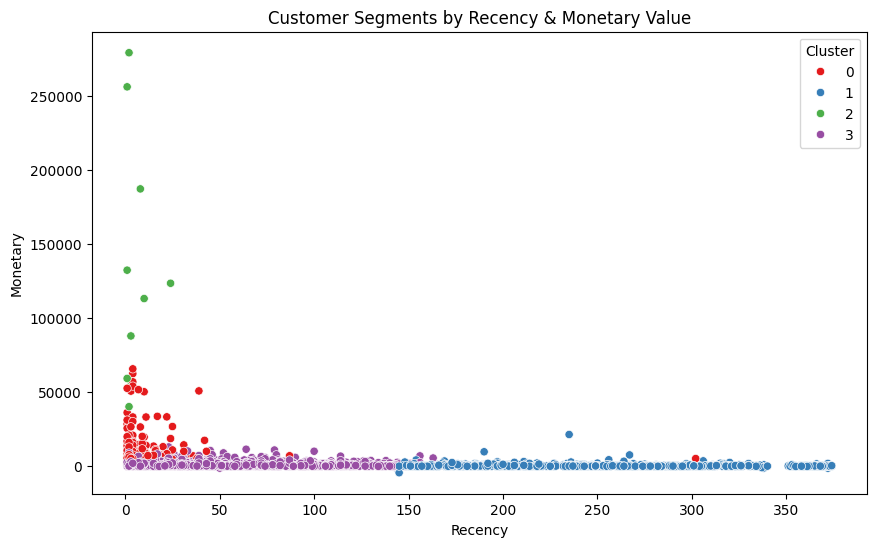

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segments by Recency & Monetary Value')
plt.show()


Cluster	Description
0	Loyal customers
1	At-risk customers
2	New customers
3	High spenders, low frequency